In [3]:
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gsw oceanic toolbox: http://www.teos-10.org/pubs/Getting_Started.pdf
import gsw
from scipy.io import loadmat
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [18]:
arctic_mix = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/arctic_mix.nc"
alberto_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/alberto_ds.nc"
global_pkl = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/input_microstructure.pkl"
global_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/L2_2D_snapshot_iy150_model_input.nc"
mosaic_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/mosaic_ds.nc"
nice_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/nice_ds.nc"
HM_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/HM_ds.nc"
NN_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/L2_2D_snapshot_iy150_model_input.nc"

arctic_ds = xr.open_dataset(arctic_mix)
alberto_ds = xr.open_dataset(alberto_nc)
global_ds = pd.read_pickle(global_pkl)
global_nn = xr.open_dataset(global_nc)
mosaic_ds = xr.open_dataset(mosaic_nc)
nice_ds = xr.open_dataset(nice_nc)
HM_ds = xr.open_dataset(HM_nc)
NN_ds = xr.open_dataset(NN_nc)

In [4]:
def check_coords(data):
    if "latitude" not in data.coords:
        data = data.set_coords("latitude")
    if "longitude" not in data.coords:
        data = data.set_coords("longitude")
    if "time" not in data.coords:
        data = data.set_coords("time")
    if "depth" not in data.coords:
        data["depth"] = data.depth
    return data

In [7]:
# define common coordinates across all datasets
coords = {"latitude": "lat", "longitude": "lon", "depth": "depth", "profile": "profile"}

## Visualise all the points

total amount of profiles is:  3001


/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:538: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:511: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


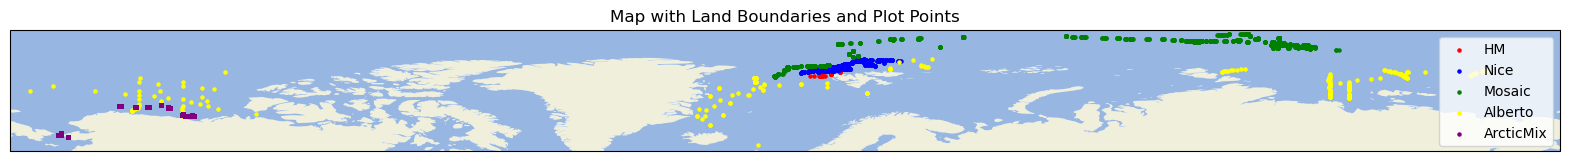

In [8]:
total_profiles = len(HM_ds["longitude"]) + len(nice_ds["longitude"]) + len(mosaic_ds["longitude"]) + len(alberto_ds["longitude"]) + len(arctic_ds["longitude"])
print("total amount of profiles is: ", total_profiles)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(HM_ds["longitude"], HM_ds["latitude"], transform=ccrs.PlateCarree(), color='red', s=5, label = "HM")
ax.scatter(nice_ds["longitude"], nice_ds["latitude"], transform=ccrs.PlateCarree(), color='blue', s=5, label = "Nice")
ax.scatter(mosaic_ds["longitude"], mosaic_ds["latitude"], transform=ccrs.PlateCarree(), color='green', s=5, label = "Mosaic")
ax.scatter(alberto_ds["longitude"], alberto_ds["latitude"], transform=ccrs.PlateCarree(), color='yellow', s=5, label = "Alberto")
ax.scatter(arctic_ds["longitude"], arctic_ds["latitude"], transform=ccrs.PlateCarree(), color='purple', s=5, label = "ArcticMix")

# Add land, ocean, and borders
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))

#ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.set_title("Map with Land Boundaries and Plot Points")
ax.legend()
plt.show()

In [9]:
# focus on the Svalbard Islands
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(HM_ds["longitude"], HM_ds["latitude"], transform=ccrs.PlateCarree(), color='red', s=5, label = "HM")
ax.scatter(nice_ds["longitude"], nice_ds["latitude"], transform=ccrs.PlateCarree(), color='blue', s=5, label = "Nice")
ax.scatter(mosaic_ds["longitude"], mosaic_ds["latitude"], transform=ccrs.PlateCarree(), color='green', s=5, label = "Mosaic")
ax.scatter(alberto_ds["longitude"], alberto_ds["latitude"], transform=ccrs.PlateCarree(), color='yellow', s=5, label = "Alberto")
ax.scatter(arctic_ds["longitude"], arctic_ds["latitude"], transform=ccrs.PlateCarree(), color='purple', s=5, label = "ArcticMix")

# Add land, ocean, and borders
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))

ax.set_extent([-30, 50, 70, 90], crs=ccrs.PlateCarree())
ax.set_title("Map with Land Boundaries and Plot Points")
ax.legend()
plt.show()


: 

: 

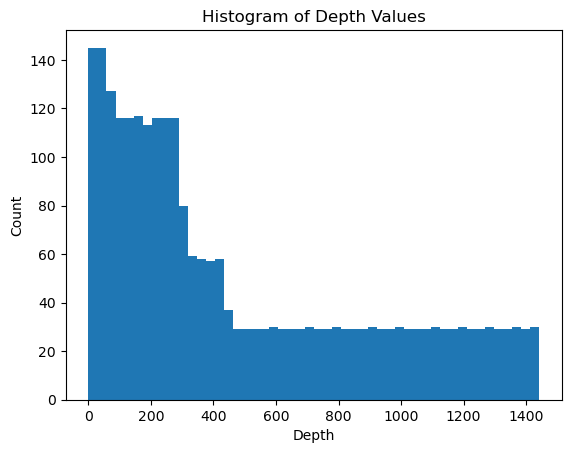

In [ ]:
# Select the depth variable from each dataset
depth1 = arctic_ds['depth'].sel()
depth2 = alberto_ds['depth'].sel()
depth3 = nice_ds['depth'].sel()
depth4 = mosaic_ds['depth'].sel()
depth5 = HM_ds['depth'].sel()

# Concatenate the depth values into a single array
depth_values = np.concatenate([depth1.values, depth2.values, depth3.values, depth4.values, depth5.values])

# Plot a histogram of the combined depth values
plt.hist(depth_values, bins=50)
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title('Histogram of Depth Values')
plt.show()

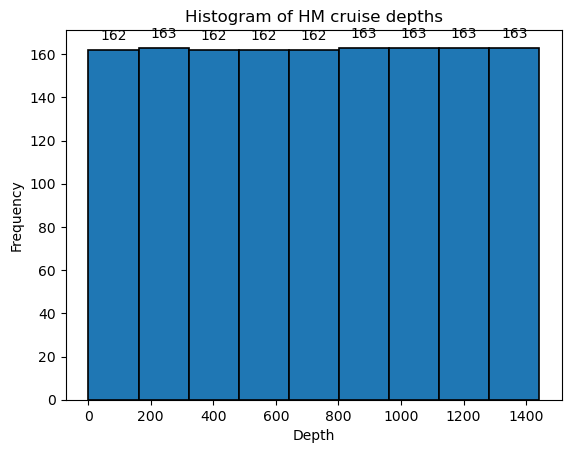

In [136]:
# take the max depth for every profile
max_depths = HM_ds.depth.values
fig, ax = plt.subplots()
n, bins, patches = plt.hist(max_depths, bins=9, edgecolor='black', linewidth=1.2)
# Add labels and title
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Histogram of HM cruise depths')

# Add text labels to each bin
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    ax.annotate(str(int(y)), xy=(x, y), xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.show()

# From now on, pretend like nice_ds is the combined_ds


In [1]:
combined_ds = mosaic_ds

NameError: name 'mosaic_ds' is not defined

# Omit NaNs
omit NaNs for T,S,eps

In [49]:
# stuk minder goed
def mask_nan(dataset):
    # Make sure there are no nans
    mask = np.isnan(dataset.T)*np.isnan(dataset.S)*np.isnan(dataset.eps)
    dataset["T"] = xr.where(mask,np.nan,dataset.T)
    dataset["S"] = xr.where(mask,np.nan,dataset.S)
    dataset["eps"] = xr.where(mask,np.nan,dataset.eps)
    return dataset

In [111]:
data = combined_ds

In [121]:
mask = data.where(np.any(np.isnan(data[['T', 'S', 'eps']])), drop=True)

In [122]:
data = data.sel(depth=mask.depth)

In [124]:
mask = data.where(np.any(np.isnan(data[['T', 'S', 'eps']])), drop=True)
data = mask.dropna(dim='depth', subset=['T', 'S', 'eps'])

In [125]:
n_nans = np.isnan(data.T).sum().values
n_nans

array(0)

In [69]:
#mask = 1-(np.isnan(combined_ds.eps.values) | np.isnan(combined_ds.T.values) | np.isnan(combined_ds.S.values) )
# Make sure there are no nans
mask = np.isnan(combined_ds.T)*np.isnan(combined_ds.S)*np.isnan(combined_ds.eps)
print(mask)
#combined_ds["T"] = xr.where(mask,np.nan,combined_ds.T)
#combined_ds["S"] = xr.where(mask,np.nan,combined_ds.S)
#combined_ds["eps"] = xr.where(mask,np.nan,combined_ds.S)

#combined_ds["T"] = combined_ds["T"][mask,:]
#combined_ds["S"] = combined_ds["S"][mask,:]
#combined_ds["eps"] = combined_ds["eps"][mask,:]
combined_ds['T'] = xr.where(mask,np.nan,combined_ds.T)
combined_ds['S'] = xr.where(mask,np.nan,combined_ds.S)
combined_ds['eps'] = xr.where(mask,np.nan,combined_ds.eps)

<xarray.DataArray (depth: 300, profile: 588)>
array([[False,  True,  True, ...,  True, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
Coordinates:
  * profile  (profile) float32 1.101e+03 1.102e+03 ... 1.687e+03 1.688e+03
  * depth    (depth) float64 0.0 1.0 2.0 3.0 4.0 ... 296.0 297.0 298.0 299.0


## Calculate features like in Mashayek et al. (2021)

In [5]:
def TS_derivative(dataset):
  dataset["dTdz"] = dataset.T.differentiate('depth')
  dataset['dSdz'] = dataset.S.differentiate('depth')
  return dataset

In [6]:
from matplotlib import colors

# define function to calculate N2
def calc_N2(rho, drho, deps):
    return (9.81 / rho) * drho / deps

def calc_N2_kappa(dataset):
    S = dataset.S
    p = dataset.P
    lon = dataset.longitude
    lat = dataset.latitude
    T = dataset.T
    eps = dataset.eps
    z = dataset.depth
    
    dataset['rho'] = gsw.rho(S, T, p)
    dataset["P"] = gsw.conversions.p_from_z(dataset["depth"],
                                            dataset["latitude"])
    dataset['drhodz'] = dataset.rho.differentiate('depth')
    dataset['depsdz'] = dataset.eps.differentiate('depth')
    
    # Calculate N^2
    g = 9.81  # acceleration due to gravity
    
    # apply the calc_N2() function to the DataArray
    N2_da = xr.apply_ufunc(calc_N2, dataset.rho, dataset.drhodz, dataset.depsdz,
                           input_core_dims=[['depth'], ['depth'], ['depth']],
                           output_core_dims=[['depth']],
                           vectorize=True)

    # add the N2 DataArray to the original dataset
    dataset['N2'] = N2_da
    dataset['kappa'] = 0.2*dataset.eps/dataset.N2
    dataset["log_N2"] = np.log10(dataset.N2)
    dataset["log_kappa"] = np.log10(dataset.kappa)
    return dataset

/var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_24787/614808365.py:5: RuntimeWarning: divide by zero encountered in divide
  return (9.81 / rho) * drho / deps
/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


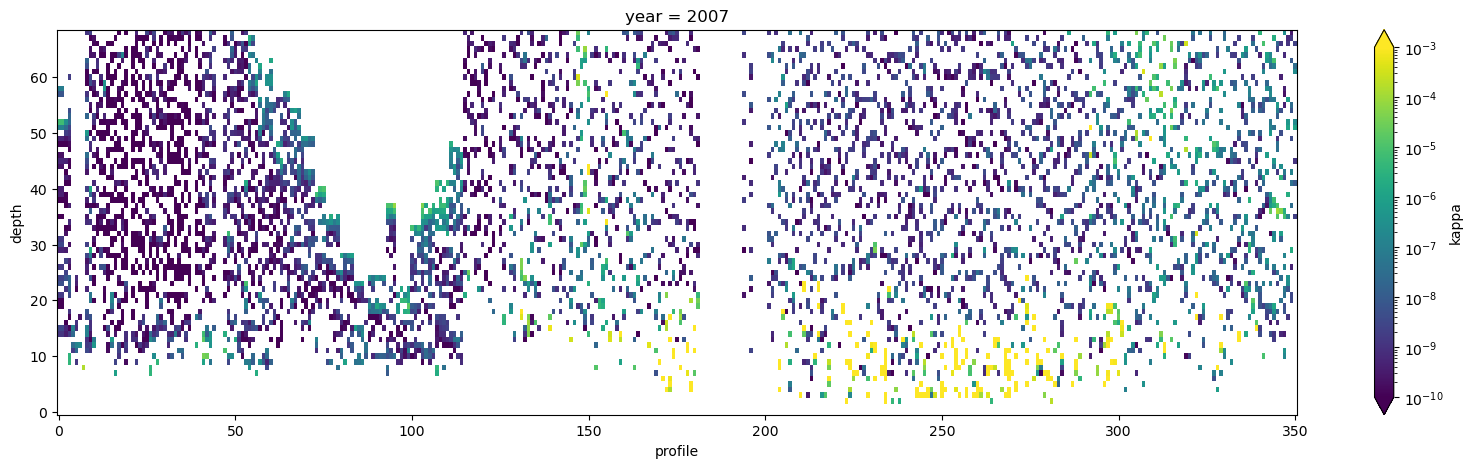

In [13]:
combined_ds = alberto_ds
combined_ds = calc_N2_kappa(combined_ds)
combined_ds = TS_derivative(combined_ds)
combined_ds.kappa.plot(y = 'depth',norm = colors.LogNorm(vmin = 1e-10, vmax = 1e-3),cmap='viridis',figsize=(20,5))

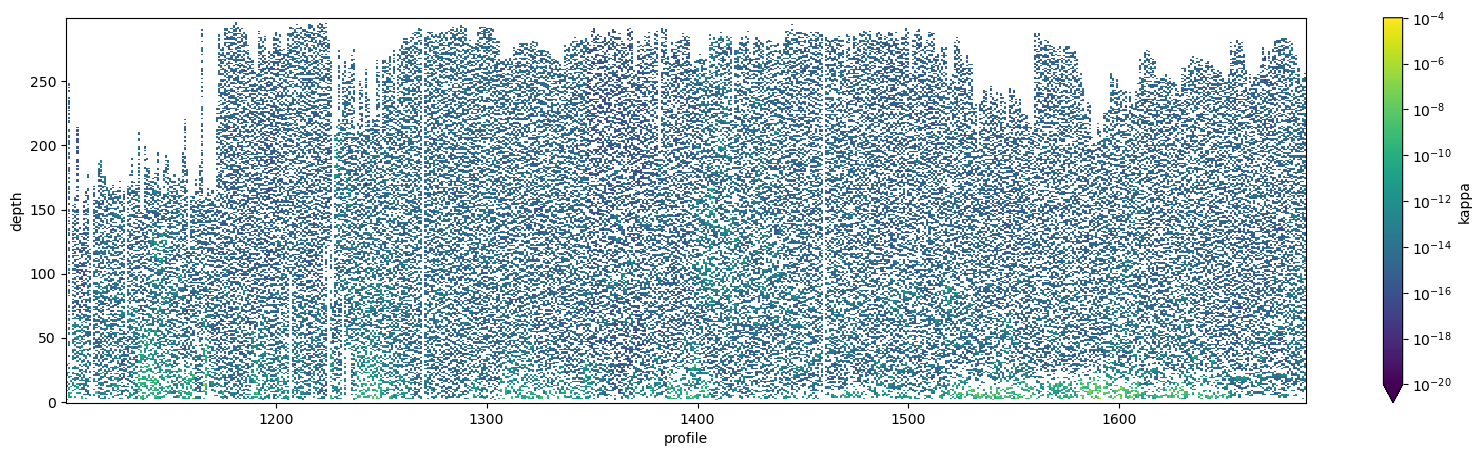

In [14]:
combined_ds = nice_ds
combined_ds = calc_N2_kappa(combined_ds)
combined_ds = TS_derivative(combined_ds)
combined_ds.kappa.plot(y = 'depth',norm = colors.LogNorm(vmin = 1e-20, vmax = 1e-4),cmap='viridis',figsize=(20,5))

/var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_24787/614808365.py:5: RuntimeWarning: divide by zero encountered in divide
  return (9.81 / rho) * drho / deps
/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


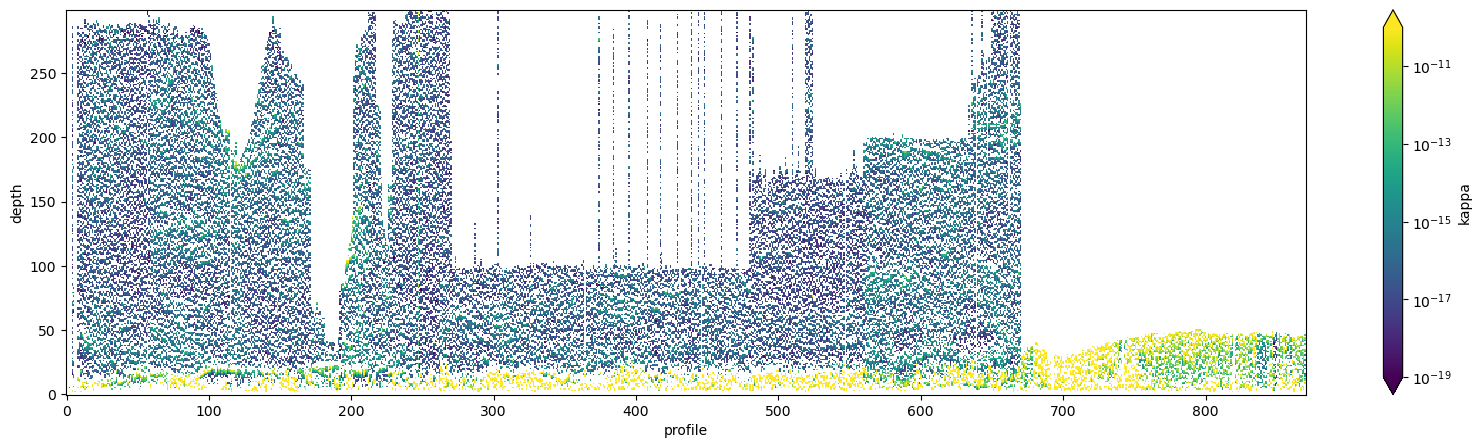

In [15]:
combined_ds = arctic_ds
combined_ds = calc_N2_kappa(combined_ds)
combined_ds = TS_derivative(combined_ds)
combined_ds.kappa.plot(y = 'depth',norm = colors.LogNorm(vmin = 1e-19, vmax = 1e-10),cmap='viridis',figsize=(20,5))

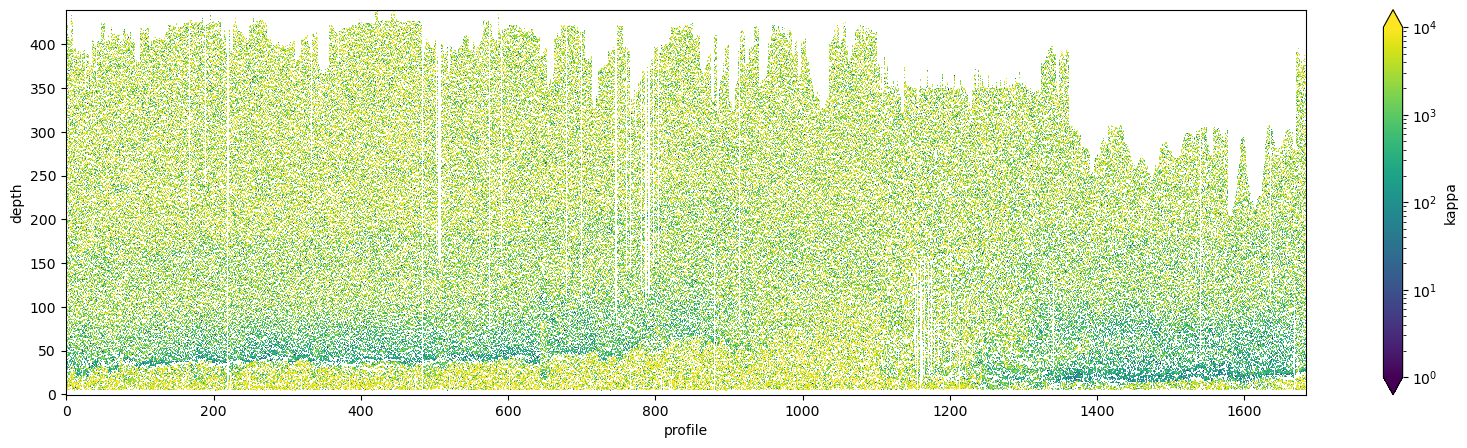

In [21]:
#combined_ds = mosaic_ds
#combined_ds = TS_derivative(combined_ds)
#combined_ds = calc_N2_kappa(combined_ds)
combined_ds.kappa.plot(y = 'depth',norm = colors.LogNorm(vmin = 1e-0, vmax = 1e4),cmap='viridis',figsize=(20,5))

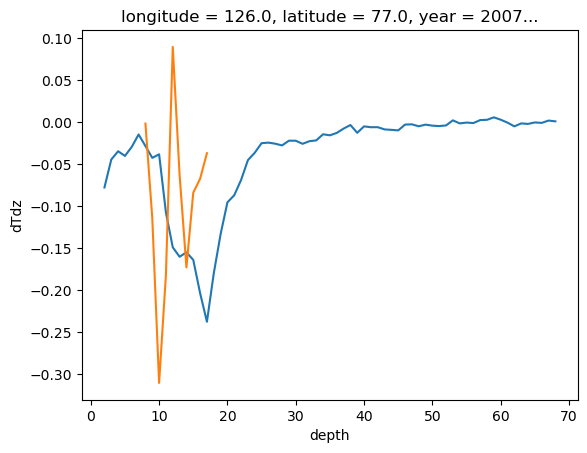

In [22]:
alberto_ds = TS_derivative(alberto_ds)
alberto_ds.dTdz.mean(dim="profile").plot()
alberto_ds.dTdz[:,6].plot()

## Hab

In [23]:
GEBCO_ds = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/gebco_2022_n80.0_s63.0_w-170.0_e-130.0.nc"
#bathy_dataset = Dataset(GEBCO_ds)
bathy_ds = xr.open_dataset(GEBCO_ds)

In [25]:
from tqdm import tqdm

In [37]:
def microlonlat_1d(data):
    microlon = data.longitude[i].values.flatten()
    microlat = data.latitude[i].values.flatten()
    return microlon, microlat

def microlonlat_1d(data):
    microlon = data.longitude[i].values.flatten()[0]
    microlat = data.latitude[i].values.flatten()[0]
    return microlon, microlat

def calc_hab(data):
    bathy_interp = bathy_ds.interp_like(data, method='nearest')
    n_profiles = data.profile.shape[0]
    profiles = np.zeros(n_profiles)
    print(n_profiles)
    print(data.profile.shape)
    
    for i in tqdm(range(n_profiles)):
        microlon = data.longitude[i].values.flatten()[0]
        microlat = data.latitude[i].values.flatten()[0]
        profiles[i] = bathy_interp.elevation.sel(lon=microlon,lat=microlat, method='nearest')
    data['bathymetry'] = data.profile.copy(data=profiles)
    
    return data

In [33]:
def calc_hab(data):
    bathy_interp = bathy_ds.interp_like(data, method='nearest')
    n_depths = data.profile.shape[0]
    depth = np.zeros(n_depths)

    for i in tqdm(range(n_depths)):
        microlon = data.longitude[i].values.flatten()
        microlat = data.latitude[i].values.flatten()
        depth[i] = bathy_interp.elevation.sel(lon=microlon,lat=microlat, method='nearest')
    data['bathymetry'] = data.profile.copy(data=depth)
    
    return data

In [44]:
alberto_hab = calc_hab(alberto_ds)

351
(351,)


100%|██████████| 351/351 [00:00<00:00, 775.61it/s]


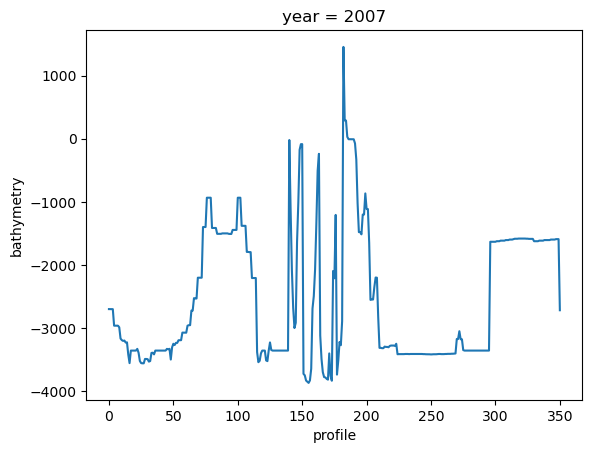

In [45]:
alberto_hab.bathymetry.plot()

In [46]:
alberto_hab["hab"] = alberto_hab.bathymetry - alberto_hab.depth

In [47]:
alberto_hab = calc_N2_kappa(alberto_hab)
alberto_hab = TS_derivative(alberto_hab)

/var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_24787/614808365.py:5: RuntimeWarning: divide by zero encountered in divide
  return (9.81 / rho) * drho / deps
/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/Lisanne/opt/anaconda3/envs/arcticT/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [50]:
alberto_hab.to_netcdf("/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/ml_ready/alberto_done.nc")

In [276]:
# group data by the 'profile' dimension
profile_groups = data.groupby('profile')

bathy_interp = bathy_ds.interp_like(data, method='nearest')
n_depths = len(profile_groups)
depth = np.zeros(n_depths)

# loop over each group
for profile, profile_data in profile_groups:
    microlat = profile_data.latitude.values.flatten()[0]
    print(microlat)
    microlon = profile_data.longitude.values.flatten()[0]
    #depth[i] = bathy_interp.elevation.sel(lon=microlon,lat=microlat, method='nearest')
    #bathymetry_value = bathy_interp.elevation.sel(lon=microlon,lat=microlat, method='nearest').values
    #data['bathymetry'][i] = bathymetry_value
#data['bathymetry'] = data.profile.copy(data=depth)
depth_arr = xr.DataArray(depth, coords=[data.profile], dims=['profile'])
data['bathymetry'] = depth_arr

65.23480184492537
65.23512227569375
65.23531526973058
65.2384665228055
72.59041176877261
72.61034523604474
71.97988832082989
71.9829634014587
71.98727185311908
71.9920938074896
71.99381667304043
71.99495842416972
71.99646606560057
71.99428927672503
71.99343791417797
71.9917542971269
71.99070847016388
71.99005879945163
71.99008703353672
71.99129630266046
71.99248500163485
71.99422030637457
71.99589354138038
71.99764128545094
71.99937801013137
72.00172739324277
72.00392910510512
72.00580265561102
72.00882478920114
72.01226993706788
72.0173232253378
72.0222136143471
72.03186877113079
72.03684506712318
72.04370728521067
72.04762189668989
72.05342351678182
72.05938473280445
72.06413878411492
72.06934768217215
72.07556979437038
72.0820072089281
72.08732372508351
72.0909708729584
72.09587770045142
72.09987770452351
72.10358088423092
72.10773304015208
72.11141606391047
72.11483226377722
72.11792010052127
72.1215219300872
72.12490196069243
72.12768496716672
72.13022475203228
72.13278333024977
7

In [246]:
depth_groups = data.groupby('profile')
depth_groups

DatasetGroupBy, grouped over 'profile'
351 groups with labels 0, 1, 2, 3, 4, ..., 347, 348, 349, 350.

In [ ]:
# loop over each group
for profile, profile_data in depth_groups:
    print(f"Depth: {depth}")
    print(depth_data)

In [230]:
bathy_interp = bathy_ds.interp_like(data, method='nearest')
n_depths = data.profile.shape[0]
 
for i in tqdm(range(data.profile.shape[0])):
    microlon = data.longitude[i].values
    microlat = data.latitude[i].values
    depth = bathy_interp.elevation.sel(lon=microlon,lat=microlat, method='nearest')
    data['bathymetry'][i] = depth

  0%|          | 0/351 [00:00<?, ?it/s]


TypeError: IndexVariable values cannot be modified

In [226]:
arctic_ds.longitude[1].values.flatten()[0].shape

()

In [227]:
arctic_ds.longitude[1].values.flatten()[0]

-166.5914036414008

In [228]:
arctic_ds.longitude[1].values.flatten()

array([-166.59140364, -166.59150839, -166.59158975, -166.59111187,
       -145.03726224, -145.03400353, -142.96828501, -142.99093867,
       -142.99617881, -142.99700666, -143.01249948, -143.02443268,
       -143.03935328, -143.06197525, -143.08022515, -143.10411604,
       -143.12497087, -143.14247227, -143.16003372, -143.18209879,
       -143.20176629, -143.21631862, -143.23007265, -143.24765716,
       -143.26363913, -143.27761507, -143.29314299, -143.30952452,
       -143.32877578, -143.34446766, -143.35601962, -143.36738657,
       -143.38639081, -143.39178859, -143.39489641, -143.40269568,
       -143.40743255, -143.40980639, -143.40634615, -143.40389358,
       -143.40350489, -143.40310502, -143.40404635, -143.40436359,
       -143.41016707, -143.40946639, -143.40969833, -143.4102605 ,
       -143.41193686, -143.41304603, -143.41422426, -143.41611058,
       -143.41716788, -143.41860701, -143.42050613, -143.42275726,
       -143.42553976, -143.43189176, -143.43540761, -138.78087

In [220]:
ff = calc_hab(arctic_ds)

 34%|███▍      | 300/871 [00:00<00:01, 541.05it/s]


IndexError: index 300 is out of bounds for axis 0 with size 300

## To do
- sort and omit NaNs
- profile, maybe can rename
- gamma and N2